# Financial Time Series

In [1]:
import warnings
warnings.simplefilter('ignore')

## pandas Basics

In [2]:
import numpy as np
import pandas as pd

### First Steps with DataFrame Class

In [3]:
df = pd.DataFrame([10, 20, 30, 40], columns=['numbers'],
                  index=['a', 'b', 'c', 'd'])
df

,numbers
a,10
b,20
c,30
d,40


In [4]:
df.index  # the index values

Index([u'a', u'b', u'c', u'd'], dtype='object')

In [5]:
df.columns  # the column names

Index([u'numbers'], dtype='object')

In [6]:
df.ix['c']  # selection via index

numbers    30
Name: c, dtype: int64

In [7]:
df.ix[['a', 'd']]  # selection of multiple indices

,numbers
a,10
d,40


In [8]:
df.ix[df.index[1:3]]  # selection via Index object

,numbers
b,20
c,30


In [9]:
df.sum()  # sum per column

numbers    100
dtype: int64

In [10]:
df.apply(lambda x: x ** 2)  # square of every element

,numbers
a,100
b,400
c,900
d,1600


In [11]:
df ** 2  # again square, this time NumPy-like

,numbers
a,100
b,400
c,900
d,1600


In [12]:
df['floats'] = (1.5, 2.5, 3.5, 4.5)
  # new column is generated
df

,numbers,floats
a,10,1.5
b,20,2.5
c,30,3.5
d,40,4.5


In [13]:
df['floats']  # selection of column

a    1.5
b    2.5
c    3.5
d    4.5
Name: floats, dtype: float64

In [14]:
df['names'] = pd.DataFrame(['Yves', 'Guido', 'Felix', 'Francesc'],
                           index=['d', 'a', 'b', 'c'])
df

,numbers,floats,names
a,10,1.5,Guido
b,20,2.5,Felix
c,30,3.5,Francesc
d,40,4.5,Yves


In [15]:
df.append({'numbers': 100, 'floats': 5.75, 'names': 'Henry'},
               ignore_index=True)
  # temporary object; df not changed

,numbers,floats,names
0,10,1.50,Guido
1,20,2.50,Felix
2,30,3.50,Francesc
3,40,4.50,Yves
4,100,5.75,Henry


In [16]:
df = df.append(pd.DataFrame({'numbers': 100, 'floats': 5.75,
                             'names': 'Henry'}, index=['z',]))
df

,floats,names,numbers
a,1.50,Guido,10
b,2.50,Felix,20
c,3.50,Francesc,30
d,4.50,Yves,40
z,5.75,Henry,100


In [17]:
df.join(pd.DataFrame([1, 4, 9, 16, 25],
            index=['a', 'b', 'c', 'd', 'y'],
            columns=['squares',]))
  # temporary object

,floats,names,numbers,squares
a,1.50,Guido,10,1.0
b,2.50,Felix,20,4.0
c,3.50,Francesc,30,9.0
d,4.50,Yves,40,16.0
z,5.75,Henry,100,NaN


In [18]:
df = df.join(pd.DataFrame([1, 4, 9, 16, 25],
                    index=['a', 'b', 'c', 'd', 'y'],
                    columns=['squares',]),
                    how='outer')
df

,floats,names,numbers,squares
a,1.50,Guido,10.0,1.0
b,2.50,Felix,20.0,4.0
c,3.50,Francesc,30.0,9.0
d,4.50,Yves,40.0,16.0
y,NaN,NaN,NaN,25.0
z,5.75,Henry,100.0,NaN


In [19]:
df[['numbers', 'squares']].mean()
  # column-wise mean

numbers    40.0
squares    11.0
dtype: float64

In [20]:
df[['numbers', 'squares']].std()
  # column-wise standard deviation

numbers    35.355339
squares     9.669540
dtype: float64

### Second Steps with DataFrame Class

In [21]:
a = np.random.standard_normal((9, 4))
a.round(6)

array([[ 0.140009, -1.243316, -0.085941,  0.96313 ],
       [-1.710087, -0.277401,  1.301157,  0.294093],
       [-0.609254,  1.504481, -0.362435, -0.412503],
       [-1.95347 ,  1.201128, -0.833267,  0.413676],
       [-2.178134,  1.097994, -0.17831 , -0.832837],
       [ 2.004121,  0.341641,  0.258221, -0.949553],
       [-1.189267,  0.281059,  0.733009,  0.739522],
       [ 0.392075,  2.158863, -0.988007,  1.955002],
       [ 1.258226,  0.196563, -0.302332,  0.009358]])

In [22]:
df = pd.DataFrame(a)
df

,0,1,2,3
0,0.140009,-1.243316,-0.085941,0.963130
1,-1.710087,-0.277401,1.301157,0.294093
2,-0.609254,1.504481,-0.362435,-0.412503
3,-1.953470,1.201128,-0.833267,0.413676
4,-2.178134,1.097994,-0.178310,-0.832837
5,2.004121,0.341641,0.258221,-0.949553
6,-1.189267,0.281059,0.733009,0.739522
7,0.392075,2.158863,-0.988007,1.955002
8,1.258226,0.196563,-0.302332,0.009358


In [23]:
df.columns = [['No1', 'No2', 'No3', 'No4']]
df

,No1,No2,No3,No4
0,0.140009,-1.243316,-0.085941,0.963130
1,-1.710087,-0.277401,1.301157,0.294093
2,-0.609254,1.504481,-0.362435,-0.412503
3,-1.953470,1.201128,-0.833267,0.413676
4,-2.178134,1.097994,-0.178310,-0.832837
5,2.004121,0.341641,0.258221,-0.949553
6,-1.189267,0.281059,0.733009,0.739522
7,0.392075,2.158863,-0.988007,1.955002
8,1.258226,0.196563,-0.302332,0.009358


In [24]:
df['No2'][3]  # value in column No2 at index position 3

1.2011284216486129

In [25]:
dates = pd.date_range('2015-1-1', periods=9, freq='M')
dates

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30'],
              dtype='datetime64[ns]', freq='M')

In [26]:
df.index = dates
df

,No1,No2,No3,No4
2015-01-31,0.140009,-1.243316,-0.085941,0.963130
2015-02-28,-1.710087,-0.277401,1.301157,0.294093
2015-03-31,-0.609254,1.504481,-0.362435,-0.412503
2015-04-30,-1.953470,1.201128,-0.833267,0.413676
2015-05-31,-2.178134,1.097994,-0.178310,-0.832837
2015-06-30,2.004121,0.341641,0.258221,-0.949553
2015-07-31,-1.189267,0.281059,0.733009,0.739522
2015-08-31,0.392075,2.158863,-0.988007,1.955002
2015-09-30,1.258226,0.196563,-0.302332,0.009358


In [27]:
np.array(df).round(6)

array([[ 0.140009, -1.243316, -0.085941,  0.96313 ],
       [-1.710087, -0.277401,  1.301157,  0.294093],
       [-0.609254,  1.504481, -0.362435, -0.412503],
       [-1.95347 ,  1.201128, -0.833267,  0.413676],
       [-2.178134,  1.097994, -0.17831 , -0.832837],
       [ 2.004121,  0.341641,  0.258221, -0.949553],
       [-1.189267,  0.281059,  0.733009,  0.739522],
       [ 0.392075,  2.158863, -0.988007,  1.955002],
       [ 1.258226,  0.196563, -0.302332,  0.009358]])

### Basic Analytics

In [28]:
df.sum()

No1   -3.845782
No2    5.261013
No3   -0.457905
No4    2.179888
dtype: float64

In [29]:
df.mean()

No1   -0.427309
No2    0.584557
No3   -0.050878
No4    0.242210
dtype: float64

In [30]:
df.cumsum()

,No1,No2,No3,No4
2015-01-31,0.140009,-1.243316,-0.085941,0.963130
2015-02-28,-1.570078,-1.520716,1.215216,1.257223
2015-03-31,-2.179331,-0.016235,0.852781,0.844720
2015-04-30,-4.132802,1.184893,0.019514,1.258396
2015-05-31,-6.310936,2.282887,-0.158796,0.425558
2015-06-30,-4.306815,2.624528,0.099425,-0.523995
2015-07-31,-5.496082,2.905587,0.832434,0.215528
2015-08-31,-5.104008,5.064450,-0.155574,2.170530
2015-09-30,-3.845782,5.261013,-0.457905,2.179888


In [31]:
df.describe()

,No1,No2,No3,No4
count,9.000000,9.000000,9.000000,9.000000
mean,-0.427309,0.584557,-0.050878,0.242210
std,1.474783,1.021899,0.725097,0.921391
min,-2.178134,-1.243316,-0.988007,-0.949553
25%,-1.710087,0.196563,-0.362435,-0.412503
50%,-0.609254,0.341641,-0.178310,0.294093
75%,0.392075,1.201128,0.258221,0.739522
max,2.004121,2.158863,1.301157,1.955002


In [32]:
np.sqrt(df)

,No1,No2,No3,No4
2015-01-31,0.374178,NaN,NaN,0.981392
2015-02-28,NaN,NaN,1.140683,0.542303
2015-03-31,NaN,1.226573,NaN,NaN
2015-04-30,NaN,1.095960,NaN,0.643176
2015-05-31,NaN,1.047852,NaN,NaN
2015-06-30,1.415670,0.584501,0.508155,NaN
2015-07-31,NaN,0.530150,0.856159,0.859955
2015-08-31,0.626159,1.469307,NaN,1.398214
2015-09-30,1.121707,0.443355,NaN,0.096738


In [33]:
np.sqrt(df).sum()

No1    3.537713
No2    6.397697
No3    2.504997
No4    4.521778
dtype: float64

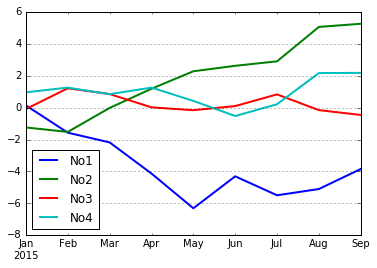

In [34]:
%matplotlib inline
df.cumsum().plot(lw=2.0, grid=True)
# tag: dataframe_plot
# title: Line plot of a DataFrame object

### Series Class

In [35]:
type(df)

pandas.core.frame.DataFrame

In [36]:
df['No1']

2015-01-31    0.140009
2015-02-28   -1.710087
2015-03-31   -0.609254
2015-04-30   -1.953470
2015-05-31   -2.178134
2015-06-30    2.004121
2015-07-31   -1.189267
2015-08-31    0.392075
2015-09-30    1.258226
Freq: M, Name: No1, dtype: float64

In [37]:
type(df['No1'])

pandas.core.series.Series

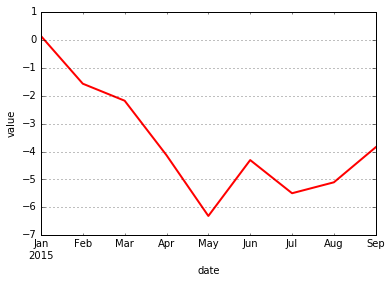

In [38]:
import matplotlib.pyplot as plt
df['No1'].cumsum().plot(style='r', lw=2., grid=True)
plt.xlabel('date')
plt.ylabel('value')
# tag: time_series
# title: Line plot of a Series object

### GroupBy Operations

In [39]:
df['Quarter'] = ['Q1', 'Q1', 'Q1', 'Q2', 'Q2', 'Q2', 'Q3', 'Q3', 'Q3']
df

,No1,No2,No3,No4,Quarter
2015-01-31,0.140009,-1.243316,-0.085941,0.963130,Q1
2015-02-28,-1.710087,-0.277401,1.301157,0.294093,Q1
2015-03-31,-0.609254,1.504481,-0.362435,-0.412503,Q1
2015-04-30,-1.953470,1.201128,-0.833267,0.413676,Q2
2015-05-31,-2.178134,1.097994,-0.178310,-0.832837,Q2
2015-06-30,2.004121,0.341641,0.258221,-0.949553,Q2
2015-07-31,-1.189267,0.281059,0.733009,0.739522,Q3
2015-08-31,0.392075,2.158863,-0.988007,1.955002,Q3
2015-09-30,1.258226,0.196563,-0.302332,0.009358,Q3


In [40]:
groups = df.groupby('Quarter')

In [41]:
groups.mean()

,No1,No2,No3,No4
Quarter,,,,
Q1,-0.726444,-0.005412,0.284260,0.281573
Q2,-0.709161,0.880254,-0.251119,-0.456238
Q3,0.153678,0.878828,-0.185777,0.901294


In [42]:
groups.max()

,No1,No2,No3,No4
Quarter,,,,
Q1,0.140009,1.504481,1.301157,0.963130
Q2,2.004121,1.201128,0.258221,0.413676
Q3,1.258226,2.158863,0.733009,1.955002


In [43]:
groups.size()

Quarter
Q1    3
Q2    3
Q3    3
dtype: int64

In [44]:
df['Odd_Even'] = ['Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even',
                  'Odd', 'Even', 'Odd']

In [45]:
groups = df.groupby(['Quarter', 'Odd_Even'])

In [46]:
groups.size()

Quarter  Odd_Even
Q1       Even        1
         Odd         2
Q2       Even        2
         Odd         1
Q3       Even        1
         Odd         2
dtype: int64

In [47]:
groups.mean()

No1       No2       No3       No4
Quarter Odd_Even                                        
Q1      Even     -1.710087 -0.277401  1.301157  0.294093
        Odd      -0.234622  0.130583 -0.224188  0.275314
Q2      Even      0.025325  0.771385 -0.287523 -0.267939
        Odd      -2.178134  1.097994 -0.178310 -0.832837
Q3      Even      0.392075  2.158863 -0.988007  1.955002
        Odd       0.034479  0.238811  0.215339  0.374440

## Financial Data

In [48]:
import pandas.io.data as web

In [49]:
#DAX = web.DataReader(name='^GDAXI', data_source='yahoo',start='2000-1-1')
#DAX.info()

In [50]:
dates = pd.date_range('20160101',periods=252)
dates
gspc = pd.read_csv('data/gspc31.csv',header=None)
import numpy  
my_matrix = gspc.as_matrix(columns=None)
DAX = pd.DataFrame(my_matrix,index=dates,columns=['Open','High','Low','Close','Volume','Adj Close'])

In [51]:
DAX.tail()

,Open,High,Low,Close,Volume,Adj Close
2016-09-04,2129.78,2133.25,2125.53,2126.15,3.922400e+09,2126.15
2016-09-05,2132.23,2140.72,2119.36,2126.41,4.019510e+09,2126.41
2016-09-06,2144.06,2147.13,2132.52,2133.04,4.204830e+09,2133.04
2016-09-07,2136.97,2145.73,2131.59,2139.43,3.775200e+09,2139.43
2016-09-08,2149.72,2151.44,2141.93,2143.16,3.751340e+09,2143.16


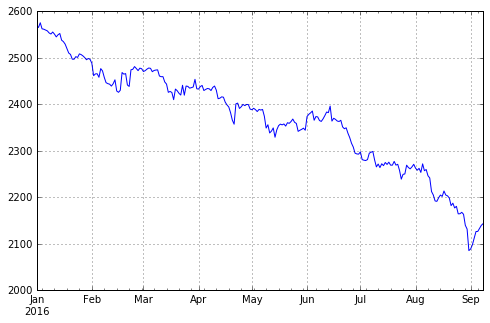

In [52]:
DAX['Close'].plot(figsize=(8, 5), grid=True)
# tag: dax
# title: Historical DAX index levels

In [53]:
%time DAX['Return'] = np.log(DAX['Close'] / DAX['Close'].shift(1))

Wall time: 3 ms


In [54]:
DAX[['Close', 'Return', 'Return']].tail()

,Close,Return,Return
2016-09-04,2126.15,0.006810,0.006810
2016-09-05,2126.41,0.000122,0.000122
2016-09-06,2133.04,0.003113,0.003113
2016-09-07,2139.43,0.002991,0.002991
2016-09-08,2143.16,0.001742,0.001742


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A3E26D8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000A6D8B00>], dtype=object)

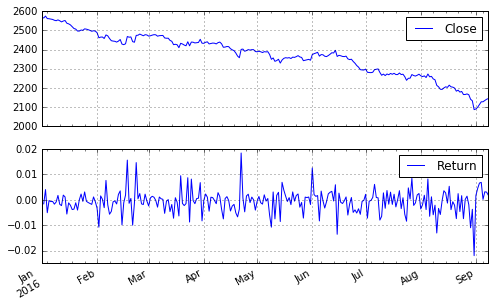

In [55]:
DAX[['Close', 'Return']].plot(subplots=True, style='b',
                              figsize=(8, 5), grid=True)
# tag: dax_returns
# title: The DAX index and daily log returns

In [56]:
DAX['12d'] = pd.rolling_mean(DAX['Close'], window=12)
DAX['52d'] = pd.rolling_mean(DAX['Close'], window=52)

In [57]:
DAX[['Close', '12d', '52d']].tail()

,Close,12d,52d
2016-09-04,2126.15,2135.042500,2215.438846
2016-09-05,2126.41,2130.544167,2212.588269
2016-09-06,2133.04,2127.947500,2209.945962
2016-09-07,2139.43,2125.862500,2207.332692
2016-09-08,2143.16,2123.835833,2204.914615


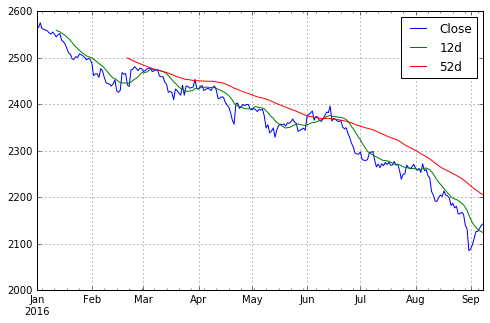

In [58]:
DAX[['Close', '12d', '52d']].plot(figsize=(8, 5), grid=True)
# tag: dax_trends
# title: The DAX index and moving averages

In [59]:
import math
DAX['Mov_Vol'] = pd.rolling_std(DAX['Return'],
                                window=252) * math.sqrt(252)
  # moving annual volatility

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B006AC8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000B3EFBA8>], dtype=object)

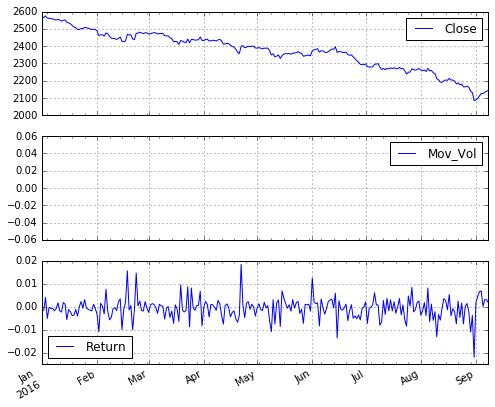

In [60]:
DAX[['Close', 'Mov_Vol', 'Return']].plot(subplots=True, style='b',
                                         figsize=(8, 7), grid=True)
# tag: dax_mov_std
# title: The DAX index and moving, annualized volatility

## Regression Analysis

In [61]:
import pandas as pd
from urllib import urlretrieve

In [62]:
#es_url = 'https://www.stoxx.com/document/Indices/Current/HistoricalData/hbrbcpe.txt'
#vs_url = 'https://www.stoxx.com/document/Indices/Current/HistoricalData/h_vstoxx.txt'
es_url = 'data/hbrbcpe.txt'
vs_url = 'data/h_vstoxx.txt'
urlretrieve(es_url, './data/es.txt')
urlretrieve(vs_url, './data/vs.txt')
#!ls -o ./data/*.txt
# Windows: use dir

('./data/vs.txt', <mimetools.Message instance at 0x000000000BBE5BC8>)

In [63]:
lines = open('./data/es.txt', 'r').readlines()
lines = [line.replace(' ', '') for line in lines]

In [64]:
lines[:6]

['PriceIndices-EUROCurrency\n',
 'Date;Blue-Chip;Blue-Chip;Broad;Broad;ExUK;ExEuroZone;Blue-Chip;Broad\n',
 ';Europe;Euro-Zone;Europe;Euro-Zone;;;Nordic;Nordic\n',
 ';SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n']

In [65]:
for line in lines[3883:3890]:
    print line[41:],

317.10;267.23;5268.36;363.19
322.55;272.18;5360.52;370.94
322.69;272.95;5360.52;370.94
327.57;277.68;5479.59;378.69;
329.94;278.87;5585.35;386.99;
326.77;272.38;5522.25;380.09;
332.62;277.08;5722.57;396.12;


In [66]:
new_file = open('./data/es50.txt', 'w')
    # opens a new file
new_file.writelines('date' + lines[3][:-1]
                    + ';DEL' + lines[3][-1])
    # writes the corrected third line of the orginal file
    # as first line of new file
new_file.writelines(lines[4:])
    # writes the remaining lines of the orginial file
new_file.close()

In [67]:
new_lines = open('./data/es50.txt', 'r').readlines()
new_lines[:5]

['date;SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF;DEL\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '02.01.1987;770.89;891.78;82.57;97.80;97.43;69.37;647.62;65.81\n',
 '05.01.1987;771.89;898.33;82.82;98.60;98.19;69.16;649.94;65.82\n']

In [68]:
es = pd.read_csv('./data/es50.txt', index_col=0,parse_dates=True, sep=';', dayfirst=True)

In [69]:
np.round(es.tail())

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF,DEL
date,,,,,,,,,
2016-09-28,2847.0,2991.0,343.0,324.0,408.0,350.0,9072.0,581.0,NaN
2016-09-29,2849.0,2992.0,343.0,324.0,408.0,351.0,9112.0,583.0,NaN
2016-09-30,2843.0,3002.0,343.0,325.0,408.0,350.0,9116.0,583.0,NaN
2016-10-03,2845.0,2998.0,343.0,325.0,408.0,351.0,9131.0,584.0,NaN
2016-10-04,2871.0,3030.0,346.0,328.0,411.0,354.0,9212.0,589.0,NaN


In [70]:
del es['DEL'] 
es.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7673 entries, 1986-12-31 to 2016-10-04
Data columns (total 8 columns):
SX5P    7673 non-null float64
SX5E    7673 non-null float64
SXXP    7673 non-null float64
SXXE    7673 non-null float64
SXXF    7673 non-null float64
SXXA    7673 non-null float64
DK5F    7673 non-null float64
DKXF    7673 non-null float64
dtypes: float64(8)
memory usage: 539.5 KB


In [71]:
cols = ['SX5P', 'SX5E', 'SXXP', 'SXXE', 'SXXF',
        'SXXA', 'DK5F', 'DKXF']
es = pd.read_csv(es_url, index_col=0, parse_dates=True,
                 sep=';', dayfirst=True, header=None,
                 skiprows=4, names=cols)

In [72]:
es.tail()

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF
2016-09-28,2846.55,2991.11,342.57,324.24,407.97,350.45,9072.09,581.27
2016-09-29,2848.93,2991.58,342.72,324.08,407.65,350.90,9112.09,582.60
2016-09-30,2843.17,3002.24,342.92,325.31,408.27,350.09,9115.81,583.26
2016-10-03,2845.43,2998.50,343.23,325.08,408.44,350.92,9131.24,584.32
2016-10-04,2871.06,3029.50,346.10,327.73,411.41,353.92,9212.05,588.71


In [73]:
vs = pd.read_csv('./data/vs.txt', index_col=0, header=2, parse_dates=True, dayfirst=True)
vs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4357 entries, 1999-01-04 to 2016-02-12
Data columns (total 9 columns):
V2TX    4357 non-null float64
V6I1    3906 non-null float64
V6I2    4357 non-null float64
V6I3    4296 non-null float64
V6I4    4357 non-null float64
V6I5    4357 non-null float64
V6I6    4340 non-null float64
V6I7    4357 non-null float64
V6I8    4343 non-null float64
dtypes: float64(9)
memory usage: 340.4 KB


In [74]:
import datetime as dt
data = pd.DataFrame({'EUROSTOXX' : es['SX5E'][es.index > dt.datetime(1999, 1, 1)]})
data = data.join(pd.DataFrame({'VSTOXX' : vs['V2TX'][vs.index > dt.datetime(1999, 1, 1)]}))

In [75]:
data = data.fillna(method='ffill')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4554 entries, 1999-01-04 to 2016-10-04
Data columns (total 2 columns):
EUROSTOXX    4554 non-null float64
VSTOXX       4554 non-null float64
dtypes: float64(2)
memory usage: 106.7 KB


In [76]:
data.tail()

,EUROSTOXX,VSTOXX
2016-09-28,2991.11,35.6846
2016-09-29,2991.58,35.6846
2016-09-30,3002.24,35.6846
2016-10-03,2998.50,35.6846
2016-10-04,3029.50,35.6846


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A3E2748>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000C083668>], dtype=object)

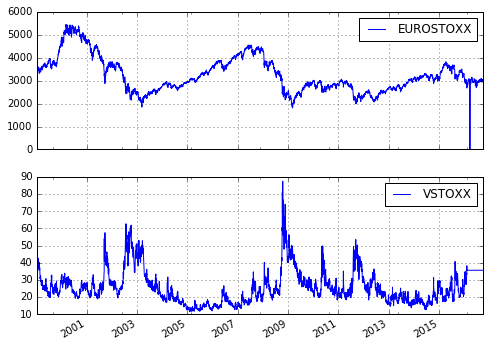

In [77]:
data.plot(subplots=True, grid=True, style='b', figsize=(8, 6))
# tag: es50_vs
# title: The EURO STOXX 50 Index and the VSTOXX volatility index

In [78]:
rets = np.log(data / data.shift(1)) 
rets.head()

,EUROSTOXX,VSTOXX
1999-01-04,NaN,NaN
1999-01-05,0.017228,0.489248
1999-01-06,0.022138,-0.165317
1999-01-07,-0.015723,0.256337
1999-01-08,-0.003120,0.021570


In [79]:
rets.head()

,EUROSTOXX,VSTOXX
1999-01-04,NaN,NaN
1999-01-05,0.017228,0.489248
1999-01-06,0.022138,-0.165317
1999-01-07,-0.015723,0.256337
1999-01-08,-0.003120,0.021570


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A0C22B0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000C853668>], dtype=object)

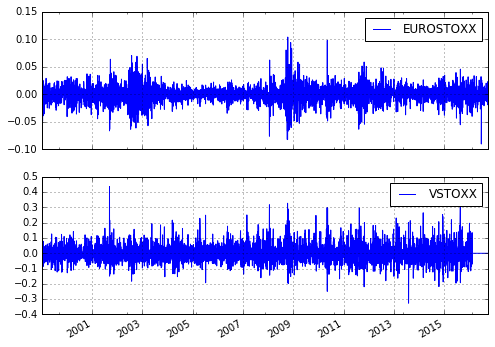

In [80]:
rets.plot(subplots=True, grid=True, style='b', figsize=(8, 6))
# tag: es50_vs_rets
# title: Log returns of EURO STOXX 50 and VSTOXX

In [81]:
xdat = rets['EUROSTOXX']

In [82]:
xdat

1999-01-04         NaN
1999-01-05    0.017228
1999-01-06    0.022138
1999-01-07   -0.015723
1999-01-08   -0.003120
1999-01-11   -0.019593
1999-01-12   -0.012490
1999-01-13   -0.048535
1999-01-14    0.008648
1999-01-15    0.017855
1999-01-18    0.025751
1999-01-19    0.000074
1999-01-20    0.024076
1999-01-21   -0.011113
1999-01-22   -0.038773
1999-01-25    0.000785
1999-01-26    0.001478
1999-01-27    0.005758
1999-01-28    0.016543
1999-01-29    0.010155
1999-02-01    0.013967
1999-02-02   -0.015581
1999-02-03   -0.015165
1999-02-04   -0.000301
1999-02-05    0.000831
1999-02-08   -0.007966
1999-02-09   -0.035187
1999-02-10   -0.005105
1999-02-11    0.014882
1999-02-12    0.008925
                ...   
2016-08-24    0.004951
2016-08-25   -0.006971
2016-08-26    0.007559
2016-08-29   -0.003948
2016-08-30    0.010698
2016-08-31   -0.002517
2016-09-01   -0.001867
2016-09-02    0.020420
2016-09-05   -0.000676
2016-09-06   -0.002440
2016-09-07    0.006978
2016-09-08   -0.002630
2016-09-09 

In [83]:
ydat = rets['VSTOXX']

In [84]:
ydat

1999-01-04         NaN
1999-01-05    0.489248
1999-01-06   -0.165317
1999-01-07    0.256337
1999-01-08    0.021570
1999-01-11    0.103173
1999-01-12    0.019496
1999-01-13    0.056180
1999-01-14   -0.015214
1999-01-15   -0.011906
1999-01-18   -0.003372
1999-01-19    0.006285
1999-01-20   -0.087044
1999-01-21    0.037636
1999-01-22    0.078801
1999-01-25    0.018836
1999-01-26    0.049160
1999-01-27   -0.023607
1999-01-28   -0.064518
1999-01-29   -0.039970
1999-02-01   -0.015610
1999-02-02    0.041794
1999-02-03    0.034404
1999-02-04   -0.029716
1999-02-05   -0.025547
1999-02-08    0.024822
1999-02-09    0.020066
1999-02-10    0.018862
1999-02-11   -0.063324
1999-02-12   -0.047845
                ...   
2016-08-24    0.000000
2016-08-25    0.000000
2016-08-26    0.000000
2016-08-29    0.000000
2016-08-30    0.000000
2016-08-31    0.000000
2016-09-01    0.000000
2016-09-02    0.000000
2016-09-05    0.000000
2016-09-06    0.000000
2016-09-07    0.000000
2016-09-08    0.000000
2016-09-09 

In [85]:
model = pd.ols(y=ydat, x=xdat)

In [86]:
#model

In [87]:
model.beta

x           NaN
intercept   NaN
dtype: float64

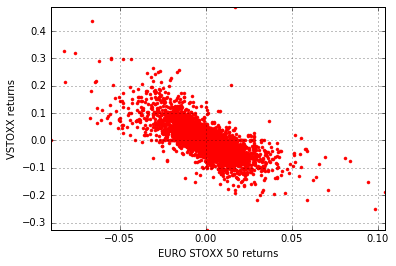

In [88]:
plt.plot(xdat, ydat, 'r.')
ax = plt.axis()  # grab axis values
x = np.linspace(ax[0], ax[1] + 0.01)
plt.plot(x, model.beta[1] + model.beta[0] * x, 'b', lw=2)
plt.grid(True)
plt.axis('tight')
plt.xlabel('EURO STOXX 50 returns')
plt.ylabel('VSTOXX returns')
# tag: scatter_rets
# title: Scatter plot of log returns and regression line

In [89]:
rets.corr()

,EUROSTOXX,VSTOXX
EUROSTOXX,1.000000,-0.724945
VSTOXX,-0.724945,1.000000


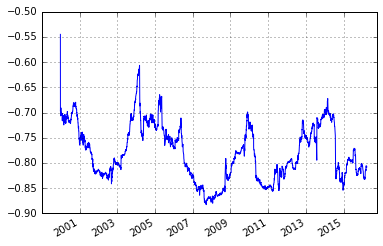

In [90]:
pd.rolling_corr(rets['EUROSTOXX'], rets['VSTOXX'],
                window=252).plot(grid=True, style='b')
# tag: roll_corr
# title: Rolling correlation between EURO STOXX 50 and VSTOXX

## High Frequency Data

In [91]:
import numpy as np
import pandas as pd
import datetime as dt
from urllib import urlretrieve
%matplotlib inline

In [92]:
url1 = 'http://www.netfonds.no/quotes/posdump.php?'
url2 = 'date=%s%s%s&paper=NKE.N&csv_format=csv'
url = url1 + url2
#url = 'http://www.netfonds.no/quotes/posdump.php?date=%s%s%s&paper=NKE.N&csv_format=csv'

In [93]:
year = '2017'
month = '10'
days = ['23', '24', '25', '26', '27']
  # dates might need to be updated

In [94]:
NKE = pd.DataFrame()
for day in days:
    NKE = NKE.append(pd.read_csv(url % (year, month, day),
                       index_col=0, header=0, parse_dates=True))
NKE.columns = ['bid', 'bdepth', 'bdeptht', 'offer', 'odepth', 'odeptht']
  # shorter colummn names

In [95]:
NKE.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48742 entries, 2017-10-23 10:00:01 to 2017-10-27 12:41:14
Data columns (total 6 columns):
bid        48742 non-null float64
bdepth     48742 non-null int64
bdeptht    48742 non-null int64
offer      48742 non-null float64
odepth     48742 non-null int64
odeptht    48742 non-null int64
dtypes: float64(2), int64(4)
memory usage: 2.6 MB


In [96]:
# No Data ,Here  we just demo day-date instead of every 5 min change
#dates = pd.date_range('20100101',periods=2520)
#dates

In [97]:
#nke6 = pd.read_csv('data/NKE.csv',header=None)
#my_matrix = nke6.as_matrix(columns=None)
#my_matrix

In [98]:
#NKE = pd.DataFrame(my_matrix,index=dates,columns=['bid', 'bdepth', 'bdeptht', 'offer', 'odepth', 'odeptht'])
#NKE.tail()
#NKE.info()

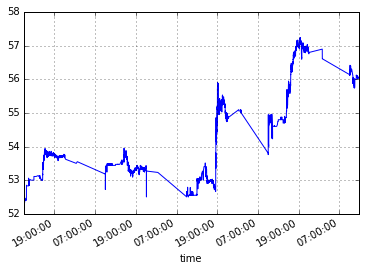

In [99]:
#NKE['bid'] = NKE['bid'].astype('float64')
NKE['bid'].plot(grid=True)
# tag: aapl
# title: Nike stock tick data for a week

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B8233C8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000001267FFD0>], dtype=object)

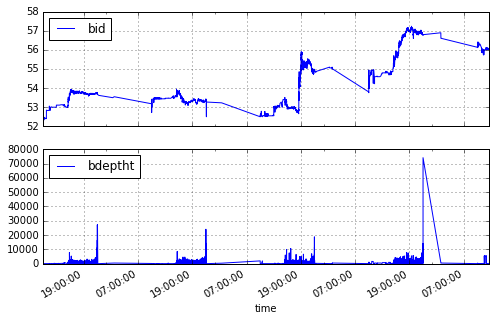

In [100]:
#NKE['bdeptht'] = NKE['bdeptht'].astype('float64')
#NKE['bid'] = NKE['bid'].astype('float64')
to_plot = NKE[['bid', 'bdeptht']][
    (NKE.index > dt.datetime(2017, 10, 1, 0, 0))
 &  (NKE.index < dt.datetime(2017, 10, 28, 2, 59))]
  # adjust dates to given data set
to_plot.plot(subplots=True, style='b', figsize=(8, 5), grid=True)
# tag: aapl_day
# title: Apple stock tick data and volume for a trading day

In [101]:
NKE_resam = NKE.resample(rule='5min', how='mean')
#NKE_resam = NKE.resample(rule='132min', how='mean')
np.round(NKE_resam.head(), 2)

,bid,bdepth,bdeptht,offer,odepth,odeptht
time,,,,,,
2017-10-23 10:00:00,52.36,100.0,100.0,53.44,100.0,100.0
2017-10-23 10:05:00,52.34,100.0,100.0,53.44,100.0,100.0
2017-10-23 10:10:00,52.36,100.0,100.0,53.44,100.0,100.0
2017-10-23 10:15:00,52.45,100.0,100.0,53.44,100.0,100.0
2017-10-23 10:20:00,52.41,100.0,100.0,53.44,100.0,100.0


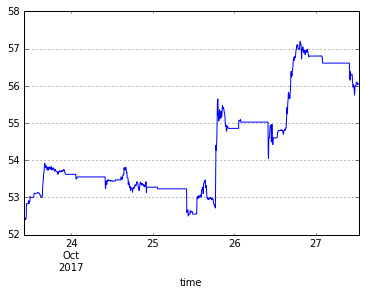

In [102]:
NKE_resam['bid'].fillna(method='ffill').plot(grid=True)
# tag: aapl_resam
# title: Resampled Apple stock tick data

In [103]:
def reversal(x):
    return 2 * 95 - x

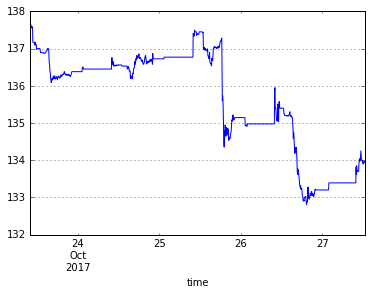

In [104]:
NKE_resam['bid'].fillna(method='ffill').apply(reversal).plot(grid=True)
# tag: aapl_resam_apply
# title: Resampled Apple stock tick data with function applied to it

In [105]:
#!rm ./data/*
  # Windows: del /data/*

## Conclusions

## Further Reading